I found this dataset on Kaggle while browsing for a suitable dataset for this project.

The target for this dataset is `charges` where the health insurance company charges the policy holder. I am not sure if this is a factitious dataset.

Aside from the mentioned target variable, the other variables in this dataset are `age`, `sex`, `bmi`, `children`, `smoker`, `region`.

The variables are self-explanatory.

As the target variable is a continuous one, this will be a regression machine learning exercise.

The dataset can be obtained from this link:
[Link to Kaggle](https://www.kaggle.com/datasets/nalisha/health-insurance-charges-dataset/data?select=insurance.csv)

I have chosen to use `uv` as the package manger.

In [77]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv 
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
load_dotenv()

DATASET_PATH = os.getenv("DATASET_PATH")

filename = "insurance.csv"


In [8]:
df = pd.read_csv(DATASET_PATH + "/" + filename)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [10]:
# check for missing data
df.isna().sum()

age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     0
dtype: int64

`age`, `bmi` and `children` have missing data. drop missing data

In [11]:
df_1 = df.dropna()
df_1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# charges is the target variable
df_1['charges'].describe()

count     1335.000000
mean     13255.381012
std      12104.185093
min       1121.873900
25%       4742.306100
50%       9377.904700
75%      16582.138605
max      63770.428010
Name: charges, dtype: float64

The mean is 13,255.38 with standard deviation of 12,104.19 and median is 9,377.90 suggests a right skewed distribution. We shall confirm this with a denisty plot.

<Axes: xlabel='charges', ylabel='Count'>

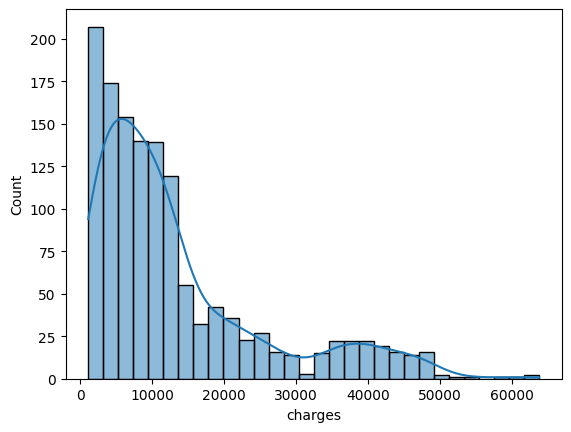

In [13]:
sns.histplot(data=df_1, x='charges', kde=True)

<positron-console-cell-14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Axes: xlabel='charges_log', ylabel='Count'>

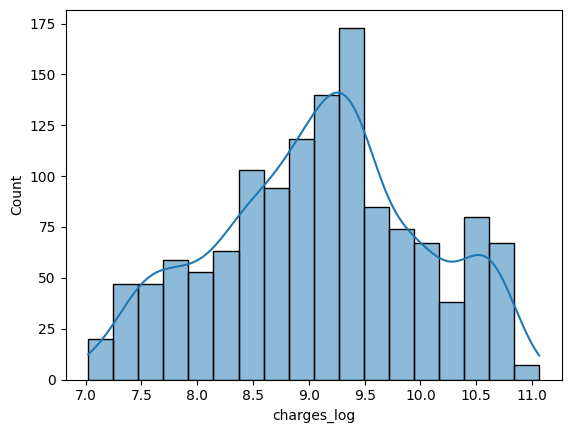

In [14]:
# Log transform charges
df_1.loc[:, 'charges_log'] = np.log1p(df_1['charges'])
sns.histplot(data=df_1, x='charges_log', kde=True)

In [72]:
# Examine age
df_1['age'].describe()

count    1335.000000
mean       39.187266
std        14.034525
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The mean age is 39.2 years old with SD of 14.0. Median age is 39. This suggests a normally distributed age. Verify this with a density plot.

<Axes: xlabel='age', ylabel='Count'>

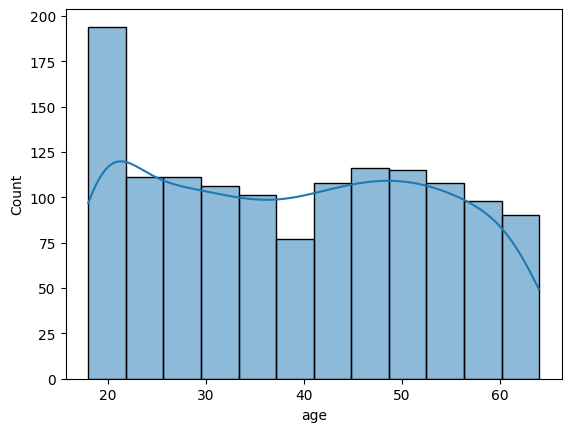

In [15]:
sns.histplot(data=df_1, x='age', kde=True)

Based on the plot, it is more of a uniform distribution than a normal distribution.

In [16]:
# Examine sex - categorical variable
df_1['sex'].value_counts().to_frame('count').assign(prop=lambda x: x['count']/x['count'].sum())

,count,prop
sex,,
male,675,0.505618
female,660,0.494382


Males and females are of equal proportion.

In [75]:
# check bmi
df_1['bmi'].describe()

count    1335.000000
mean       30.665404
std         6.102598
min        15.960000
25%        26.302500
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

Mean BMI is 30.7 with SD of 6.1 and median of 30.0.

<Axes: xlabel='bmi', ylabel='Count'>

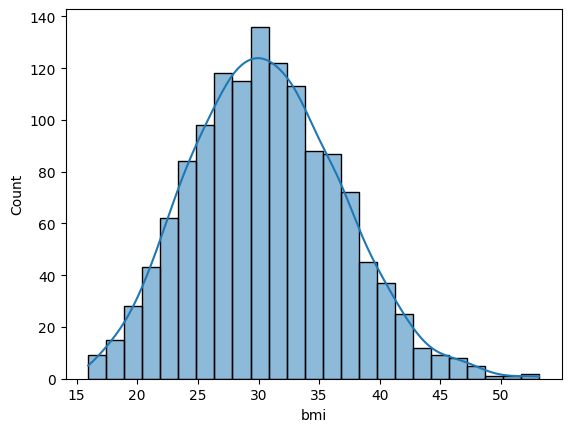

In [76]:
sns.histplot(data=df_1, x='bmi', kde=True)


`bmi` has is normally distributed.

In [77]:
# check children
df_1['children'].value_counts().to_frame('count').assign(prop = lambda x: x['count']/x['count'].sum())

,count,prop
children,,
0.0,571,0.427715
1.0,324,0.242697
2.0,240,0.179775
3.0,157,0.117603
4.0,25,0.018727
5.0,18,0.013483


0.43 has no children, followed by 0.24 with 1 child and 0.18 with 2 children.

In [17]:
# change to categorical variable
df_1.loc[:, 'children_cat'] = df_1['children'].astype('category') 

<positron-console-cell-17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [79]:
# examine smoker
df_1['smoker'].value_counts().to_frame('count').assign(prop = lambda x: x['count']/x['count'].sum())

,count,prop
smoker,,
no,1062,0.795506
yes,273,0.204494


0.80 of the sample are non-smokers.

In [80]:
# check regions
df_1['region'].value_counts()

region
southeast    364
southwest    324
northeast    324
northwest    323
Name: count, dtype: int64

There are equal representation from the four regions.

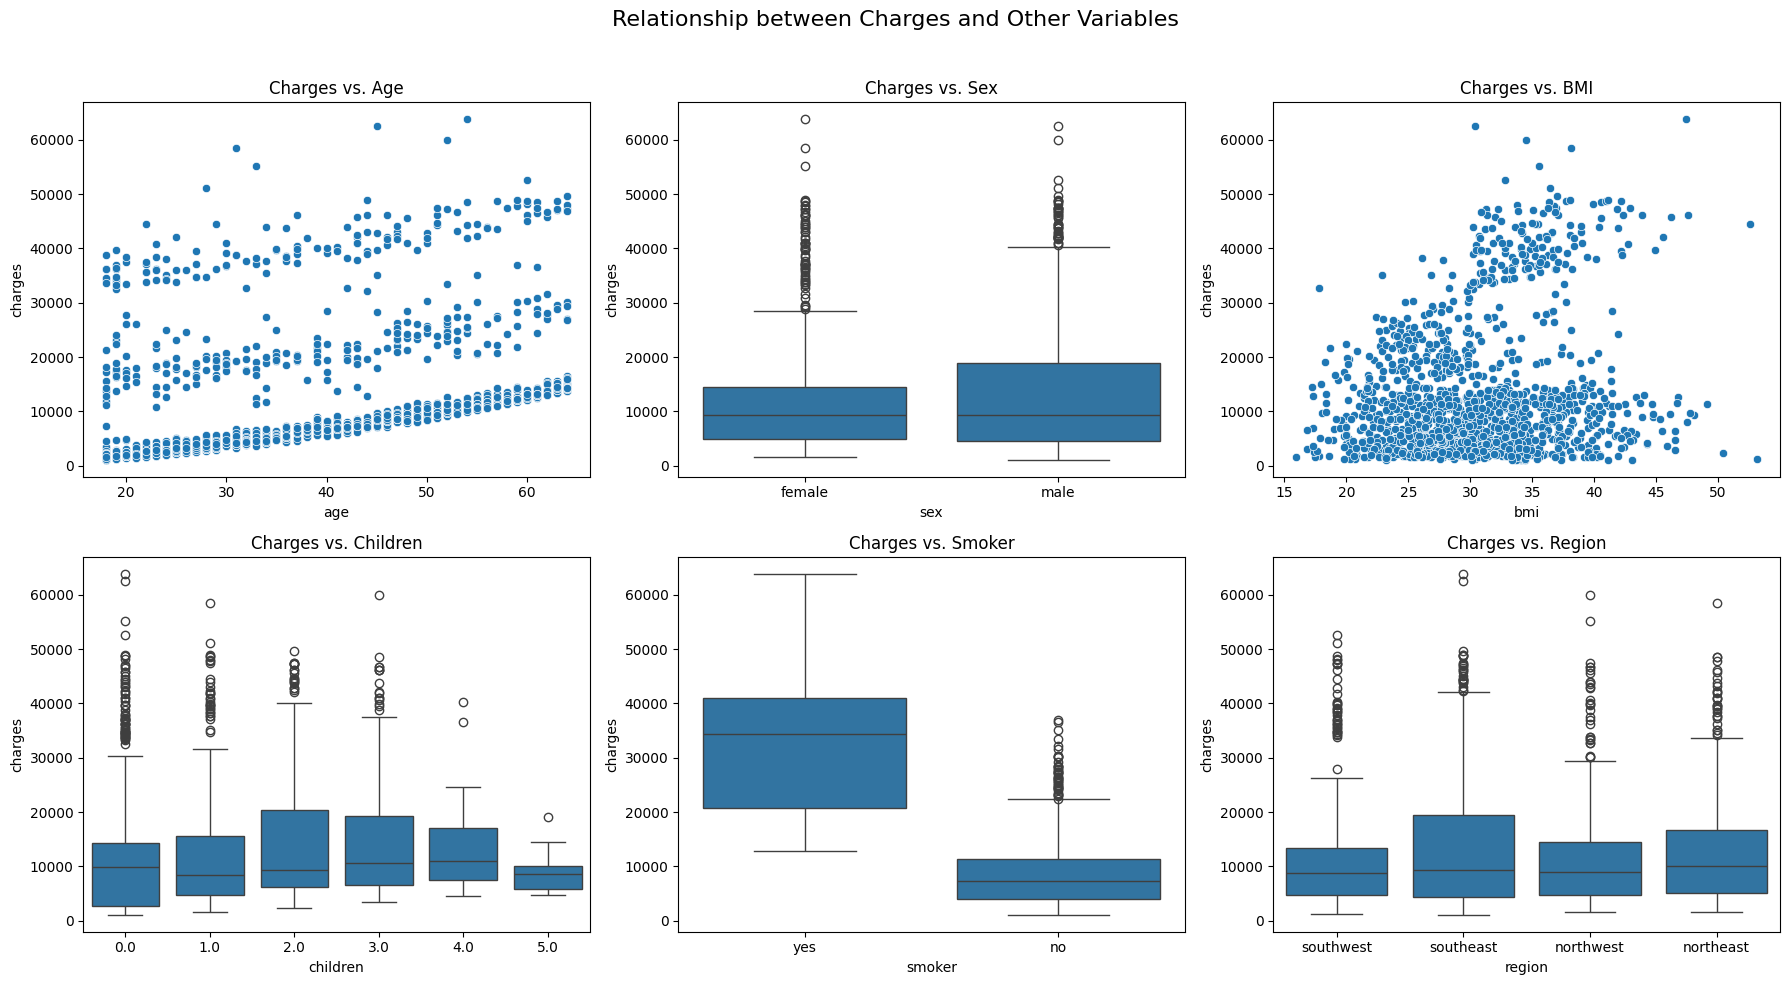

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Relationship between Charges and Other Variables", fontsize=16)

# Plotting relationships
sns.scatterplot(ax=axes[0, 0], data=df_1, x="age", y="charges")
axes[0, 0].set_title("Charges vs. Age")

sns.boxplot(ax=axes[0, 1], data=df_1, x="sex", y="charges")
axes[0, 1].set_title("Charges vs. Sex")

sns.scatterplot(ax=axes[0, 2], data=df_1, x="bmi", y="charges")
axes[0, 2].set_title("Charges vs. BMI")

sns.boxplot(ax=axes[1, 0], data=df_1, x="children", y="charges")
axes[1, 0].set_title("Charges vs. Children")

sns.boxplot(ax=axes[1, 1], data=df_1, x="smoker", y="charges")
axes[1, 1].set_title("Charges vs. Smoker")

sns.boxplot(ax=axes[1, 2], data=df_1, x="region", y="charges")
axes[1, 2].set_title("Charges vs. Region")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- Smokers are charged more.
- Variability in charges decreases as the number of children increases.
- The spread of charges for males is larger compared to females.
- For BMI, there's a trend towards increasing charges as BMI increases
- For regions, median charges are the same, however, southeast has more variations in charges.
- Increase charges as age increases, however, there are distinct bands of charges with increasing age.

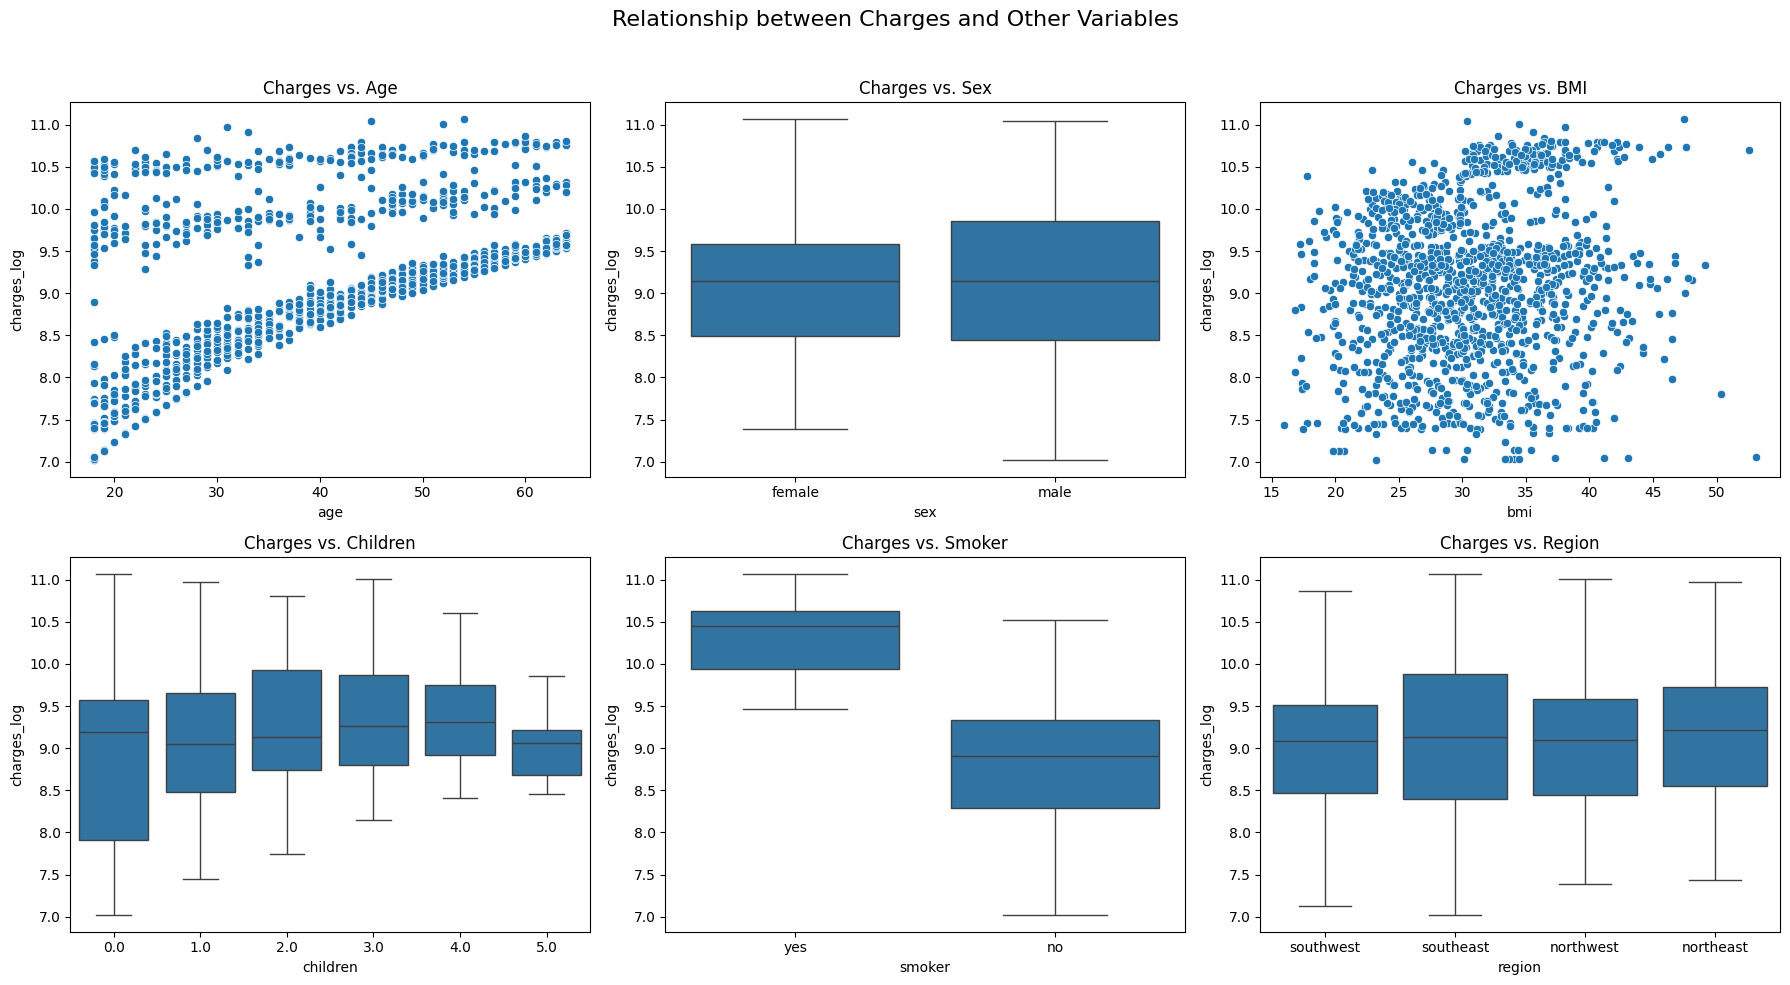

In [19]:
# Plot the log of charges
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Relationship between Charges and Other Variables", fontsize=16)

# Plotting relationships
sns.scatterplot(ax=axes[0, 0], data=df_1, x="age", y="charges_log")
axes[0, 0].set_title("Charges vs. Age")

sns.boxplot(ax=axes[0, 1], data=df_1, x="sex", y="charges_log")
axes[0, 1].set_title("Charges vs. Sex")

sns.scatterplot(ax=axes[0, 2], data=df_1, x="bmi", y="charges_log")
axes[0, 2].set_title("Charges vs. BMI")

sns.boxplot(ax=axes[1, 0], data=df_1, x="children", y="charges_log")
axes[1, 0].set_title("Charges vs. Children")

sns.boxplot(ax=axes[1, 1], data=df_1, x="smoker", y="charges_log")
axes[1, 1].set_title("Charges vs. Smoker")

sns.boxplot(ax=axes[1, 2], data=df_1, x="region", y="charges_log")
axes[1, 2].set_title("Charges vs. Region")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


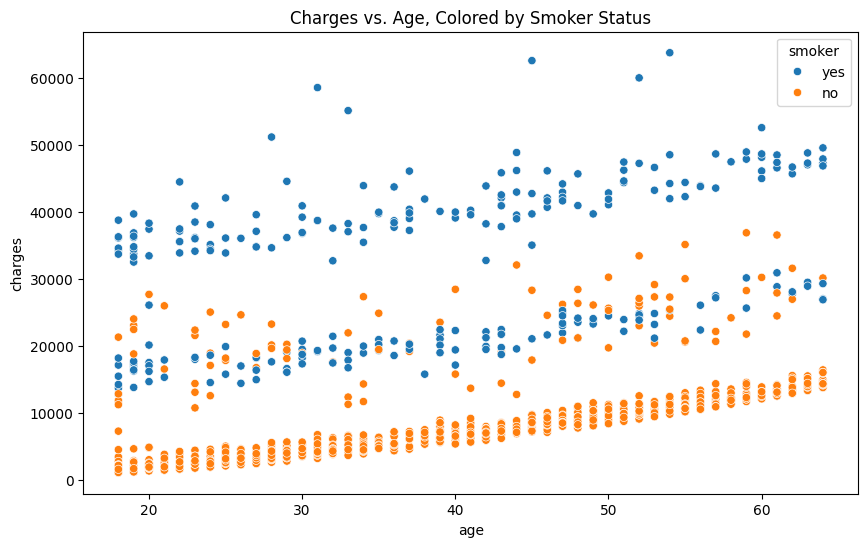

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x="age", y="charges", hue="smoker")
plt.title("Charges vs. Age, Colored by Smoker Status")
plt.show()


There are two distinct bands between smokers and non-smokers. In general, smokers are charged more, however in this (and non-smokers), there clearly are two distinct levels. This could be due to their BMI status.

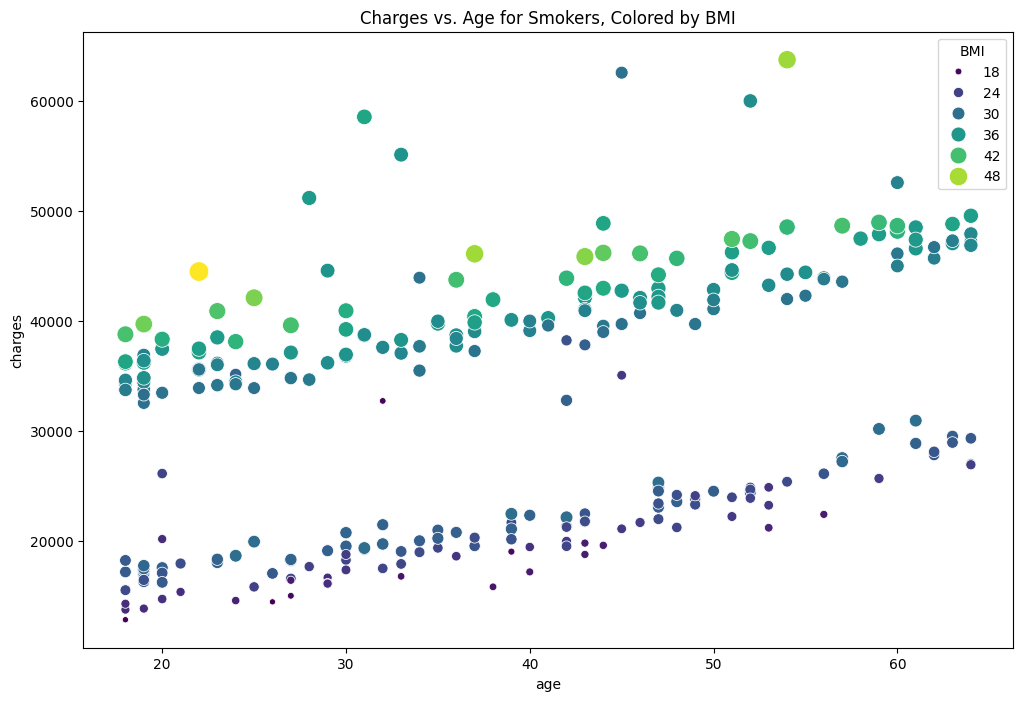

In [21]:
# Filter the dataframe to include only smokers
smokers_df = df_1[df_1["smoker"] == "yes"]

# Create the scatter plot for smokers, with color representing BMI
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=smokers_df,
    x="age",
    y="charges",
    hue="bmi",
    palette="viridis",
    size="bmi",
    sizes=(20, 200),
)
plt.title("Charges vs. Age for Smokers, Colored by BMI")
plt.legend(title="BMI")
plt.show()


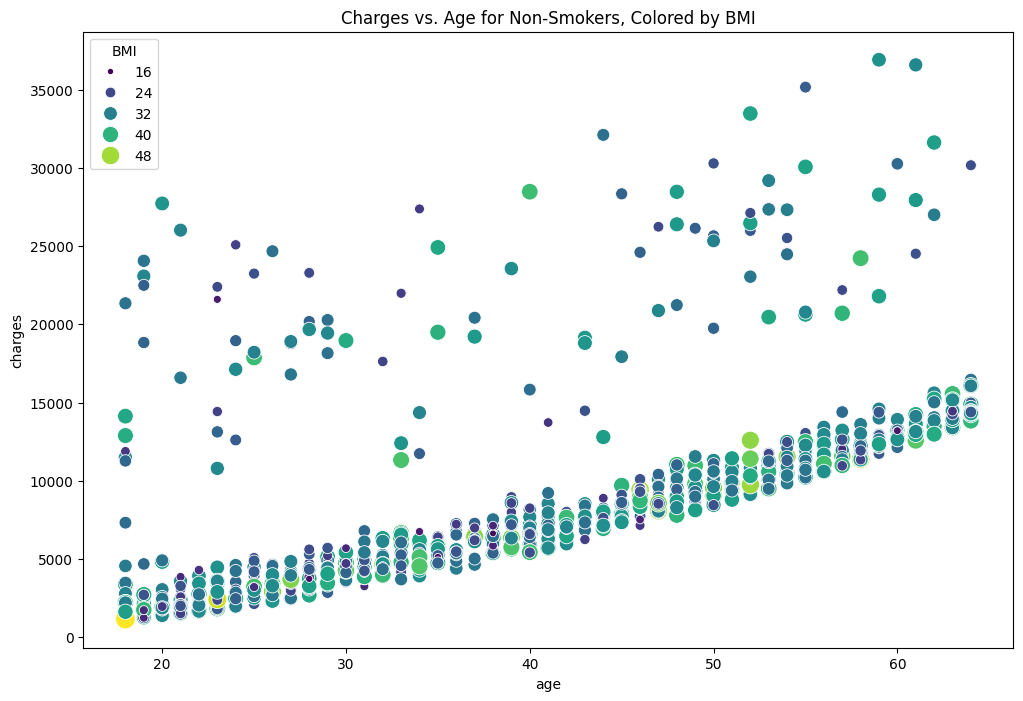

In [85]:
# Filter the dataframe to include only smokers
smokers_df = df_1[df_1["smoker"] == "no"]

# Create the scatter plot for smokers, with color representing BMI
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=smokers_df,
    x="age",
    y="charges",
    hue="bmi",
    palette="viridis",
    size="bmi",
    sizes=(20, 200),
)
plt.title("Charges vs. Age for Non-Smokers, Colored by BMI")
plt.legend(title="BMI")
plt.show()


The target variable `charges` is continuous. So we will implement a regression machine learning model.

In [88]:
# Check if there are significant differences in charges between regions
# Given charges is right skewed, using ANOVA will not be valid, so we will perform a non-parametric
# test using the Kruskal-Wallis test

from scipy.stats import kruskal

# Create a list containing the 'charges' Series for each unique region




In [99]:
regions = df_1['region'].unique().tolist()
regions_list = [df_1['charges'][df_1['region'] == region] for region in regions]
stat, p_value = kruskal(*regions_list)
(stat, p_value)

(np.float64(4.749524324444925), np.float64(0.1910842285381611))

p-value is **0.19**, greater than 0.05, so we fail to reject the null hypothesis that at least one median is different among the different regions.
In this instance, we will not include `region` in the features list.

In [24]:
def split_data(X, y, test_size=0.2, val_size=0.25, random_state=42):
    """
    Split data into train, validation, and test sets
    """
    # First split: separate test set
    X_full_train, X_test, y_full_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Second split: separate train and validation from full train
    X_train, X_val, y_train, y_val = train_test_split(
        X_full_train, y_full_train, test_size=val_size, random_state=random_state
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

def prepare_features(X_train, X_val, X_test):
    """
    Convert dataframes to dictionaries and apply one-hot encoding
    """
    # Convert to dictionaries
    train_dict = X_train.to_dict(orient="records")
    val_dict = X_val.to_dict(orient="records")
    test_dict = X_test.to_dict(orient="records")

    # Initialize and fit DictVectorizer
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    # Transform the data
    X_train_encoded = dv.transform(train_dict)
    X_val_encoded = dv.transform(val_dict)
    X_test_encoded = dv.transform(test_dict)

    return X_train_encoded, X_val_encoded, X_test_encoded, dv

def preprocess_data(df, target_column):
    """
    Basic preprocessing: handle missing values, normalize column names
    """
    # Make a copy to avoid modifying original dataframe
    df_copy = df.copy()

    # Normalize column names
    df_copy.columns = df_copy.columns.str.lower().str.replace(" ", "_")

    # Handle missing values for numeric columns
    numeric_columns = df_copy.select_dtypes(include=["number"]).columns
    df_copy[numeric_columns] = df_copy[numeric_columns].fillna(0)

    # Handle missing values for categorical columns
    categorical_columns = df_copy.select_dtypes(include=["object"]).columns
    df_copy[categorical_columns] = df_copy[categorical_columns].fillna("missing")

    # Separate features and target
    y = df_copy[target_column].values
    X = df_copy.drop(columns=[target_column])

    return X, y, df_copy


In [25]:
def train_linear_regression(X, y):
    """
    Train a basic linear regression model
    """
    model = LinearRegression()
    model.fit(X, y)
    return model


def train_ridge_regression(X, y, alpha=1.0):
    """
    Train a Ridge regression model (L2 regularization)
    """
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    return model


def train_lasso_regression(X, y, alpha=1.0):
    """
    Train a Lasso regression model (L1 regularization)
    """
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    return model


In [ ]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    """
    Evaluate model on train and validation sets
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    return {
        "train_rmse": train_rmse,
        "val_rmse": val_rmse,
        "train_r2": train_r2,
        "val_r2": val_r2,
    }


In [27]:
def tune_regularization(X_train, X_val, y_train, y_val, alphas):
    """
    Find the best regularization parameter
    """
    results = []

    for alpha in alphas:
        model = train_ridge_regression(X_train, y_train, alpha=alpha)
        metrics = evaluate_model(model, X_train, X_val, y_train, y_val)
        results.append(
            {
                "alpha": alpha,
                "val_rmse": metrics["val_rmse"],
                "val_r2": metrics["val_r2"],
            }
        )

    # Convert to DataFrame for easier analysis
    results_df = pd.DataFrame(results)
    best_alpha = results_df.loc[results_df["val_rmse"].idxmin(), "alpha"]

    return results_df, best_alpha


In [28]:
def save_model(model, dv, filename):
    """
    Save model and dictionary vectorizer to a file
    """
    with open(filename, "wb") as f_out:
        pickle.dump((model, dv), f_out)
    print(f"Model saved to {filename}")


def load_model(filename):
    """
    Load model and dictionary vectorizer from a file
    """
    with open(filename, "rb") as f_in:
        model, dv = pickle.load(f_in)
    return model, dv


In [100]:
#  preprocess the data using preprocess_data
# returns X, y and df
target = 'charges_log'
# features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
features = ['age', 'sex', 'bmi', 'children', 'smoker']
# features = ['age']
X, y, df_processed = preprocess_data(df_1[features + [target]], target)

In [101]:
# split the data

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [102]:
# prepare features
X_train_encoded, X_val_encoded, X_test_encoded, dv = prepare_features(X_train, X_val, X_test)

In [103]:
# train a ridge and lasso regression
model_regular, model_ridge, model_lasso = [
    m(X_train_encoded, y_train)
    for m in [train_linear_regression, train_ridge_regression, train_lasso_regression]
]


In [104]:
# 5. Evaluate model
metrics_regular= evaluate_model(model_regular, X_train_encoded, X_val_encoded, y_train, y_val)
metrics_ridge= evaluate_model(model_ridge, X_train_encoded, X_val_encoded, y_train, y_val)
metrics_lasso = evaluate_model(model_lasso, X_train_encoded, X_val_encoded, y_train, y_val)
print("Regular Regresson")
print(f"Validation RMSE: {metrics_regular['val_rmse']:.2f}")
print(f"Validation R²: {metrics_regular['val_r2']:.2f}")
print("Ridge Regresson")
print(f"Validation RMSE: {metrics_ridge['val_rmse']:.2f}")
print(f"Validation R²: {metrics_ridge['val_r2']:.2f}")
print("Lasso Regression")
print(f"Validation RMSE: {metrics_lasso['val_rmse']:.2f}")
print(f"Validation R²: {metrics_lasso['val_r2']:.2f}")


Regular Regresson
Validation RMSE: 0.37
Validation R²: 0.82
Ridge Regresson
Validation RMSE: 0.37
Validation R²: 0.82
Lasso Regression
Validation RMSE: 0.72
Validation R²: 0.33


In [108]:
# 6. Tune hyperparameters
alphas = [0, 0.01, 0.1, 1, 10, 100]
results_df, best_alpha = tune_regularization(X_train_encoded, X_val_encoded, y_train, y_val, alphas)
print(f"Best alpha: {best_alpha}")

# 7. Train final model with best hyperparameters
final_model = train_ridge_regression(X_train_encoded, y_train, alpha=best_alpha)

# 8. Save model
save_model(final_model, dv, "regression_model.bin")

# 9. Load model and make predictions
# loaded_model, loaded_dv = load_model("regression_model.bin")
# predictions = predict(loaded_model, loaded_dv, X_test)


Best alpha: 1.0
Model saved to regression_model.bin


In [106]:
# Make predictions on the test set
y_pred_test = final_model.predict(X_test_encoded)

# Calculate RMSE and R-squared for the test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

# Print the results
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")


Test RMSE: 0.47
Test R²: 0.72


In [107]:
# 1. Make predictions with your model (output is on the log scale)
log_predictions = final_model.predict(X_test_encoded)

# 2. Convert both predictions and actual test values back to the original dollar scale
original_scale_predictions = np.expm1(log_predictions)
original_scale_y_test = np.expm1(y_test)

# 3. Calculate the RMSE using the dollar-scale values
# Assumes you have a function: rmse(y_true, y_predicted)
mse_in_dollars = mean_squared_error(original_scale_y_test, original_scale_predictions)
rmse_in_dollars = np.sqrt(mse_in_dollars)
# 4. Print the final, interpretable RMSE
print(f"Final RMSE in dollars: ${rmse_in_dollars:.2f}")


Final RMSE in dollars: $8767.10


In [109]:
# Example workflow for a new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 1. Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# 2. Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# 3. Evaluate
metrics_rf = evaluate_model(rf_model, X_train_scaled, X_val_scaled, y_train, y_val)
print(f"Random Forest Validation RMSE: {metrics_rf['val_rmse']:.2f}")


Random Forest Validation RMSE: 0.40


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 1. Scale the features (good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 2. Define the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# 3. Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 4. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 5. Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_spl

In [113]:
# 6. View the best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated RMSE: {-grid_search.best_score_:.2f}")

# 7. Get the best model and evaluate it
best_rf_model = grid_search.best_estimator_
metrics_best_rf = evaluate_model(best_rf_model, X_train_scaled, X_val_scaled, y_train, y_val)
print("\nBest Random Forest Model Performance on Validation Set:")
print(f"Validation RMSE: {metrics_best_rf['val_rmse']:.2f}")
print(f"Validation R²: {metrics_best_rf['val_r2']:.2f}")


Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated RMSE: 0.40

Best Random Forest Model Performance on Validation Set:
Validation RMSE: 0.33
Validation R²: 0.86


In [115]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 1. Scale the features (important for XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 2. Define the model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Standard objective for regression
    random_state=42,
    n_jobs=-1
)

# 3. Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# 4. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 5. Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [116]:
# 6. View the best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated RMSE: {-grid_search.best_score_:.2f}")

# 7. Get the best model and evaluate it
best_xgb_model = grid_search.best_estimator_
metrics_best_xgb = evaluate_model(best_xgb_model, X_train_scaled, X_val_scaled, y_train, y_val)
print("\nBest XGBoost Model Performance on Validation Set:")
print(f"Validation RMSE: {metrics_best_xgb['val_rmse']:.2f}")
print(f"Validation R²: {metrics_best_xgb['val_r2']:.2f}")

Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Best cross-validated RMSE: 0.38

Best XGBoost Model Performance on Validation Set:
Validation RMSE: 0.31
Validation R²: 0.88


Seems like `xgboost` produced the lowest rmse at 0.31 and an r^2 of 0.88.


In [117]:
import pickle

def save_model_and_preprocessors(model, dv, scaler, filename):
    """
    Save the trained model, DictVectorizer, and StandardScaler to a file.
    """
    with open(filename, "wb") as f_out:
        pickle.dump((model, dv, scaler), f_out)
    print(f"Model, vectorizer, and scaler saved to {filename}")


In [118]:
# Assuming 'best_xgb_model' is your tuned XGBoost model from GridSearchCV
# 'dv' is your fitted DictVectorizer
# 'scaler' is your fitted StandardScaler

# Define a filename for your saved model
model_filename = "xgboost_insurance_model.bin"

# Save the model and preprocessors
save_model_and_preprocessors(best_xgb_model, dv, scaler, model_filename)


Model, vectorizer, and scaler saved to xgboost_insurance_model.bin


In [ ]:
def load_model_and_preprocessors(filename):
    """
    Load the model, DictVectorizer, and StandardScaler from a file.
    """
    with open(filename, "rb") as f_in:
        model, dv, scaler = pickle.load(f_in)
    return model, dv, scaler


In [ ]:
# Load the saved artifacts
loaded_model, loaded_dv, loaded_scaler = load_model_and_preprocessors(model_filename)

# Example: Create a new data point (as a dictionary)
# This should have the same structure as your original training data
new_customer = {
    'age': 45,
    'sex': 'male',
    'bmi': 30.5,
    'children': 2,
    'smoker': 'no',
    'region': 'northwest'
}

# 1. Vectorize the new data using the loaded DictVectorizer
new_data_dict = [new_customer] # DictVectorizer expects a list of dictionaries
new_data_encoded = loaded_dv.transform(new_data_dict)

# 2. Scale the new data using the loaded StandardScaler
new_data_scaled = loaded_scaler.transform(new_data_encoded)

# 3. Make a prediction (output will be on the log scale)
log_prediction = loaded_model.predict(new_data_scaled)

# 4. Convert the prediction back to the original dollar scale
final_prediction = np.expm1(log_prediction)

print(f"Predicted insurance charge: ${final_prediction[0]:.2f}")
